# Aktivierungsfunktionen
Deep Learning - KI29  
Deggendorf Institute of Technology  
Prof. Dr. Florian Wahl

In [2]:
import nnfs
import numpy as np

from nnfs.datasets import spiral_data
import seaborn as sns

Bevor es weiter geht sollten wir 2 Dinge klären:
1. Berechnung des Outputs eines Layers formalisieren und in eine Klasse kapseln.
2. Generierung von Testdaten.

## Forward pass berechnen
Die bisherige Berechnung nennt man den Forward Pass, da diese im Inference Schritt durchgeführt wird.
Im nächsten Schritt soll eine Layer Klasse erstellt werden. Diese initialisiert die Neuronen und berechnet den Output je Neuron.

In [3]:
class Layer_Dense:
    def __init__(self, n_inputs: int, n_neurons: int) -> None:
        self.weights: np.array = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases: np.array = np.zeros((1, n_neurons), dtype=float)
        self.output = None

    def forward(self, inputs: np.array) -> None:
        self.output: np.array = np.dot(inputs, self.weights) + self.biases

## Testdaten generieren
Nun benötigen wir noch Testdaten. Diese können mittels der Bibliothek nnfs generiert werden.

<Axes: >

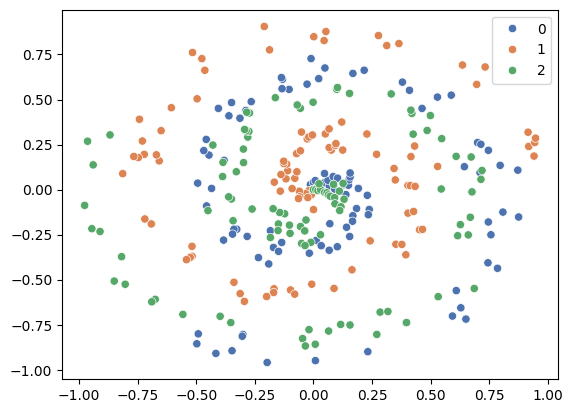

In [19]:
X, y = spiral_data(samples=100, classes=3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="deep")

In [4]:
dense1 = Layer_Dense(2, 3)
dense1.weights

array([[-0.00688993,  0.00182602, -0.00255248],
       [-0.00194802, -0.01362214,  0.00612819]])

In [5]:
dense1.forward(X)

In [6]:
(y == dense1.output.argmax(axis=1)).sum()

67

In [7]:
percentage = (y == dense1.output.argmax(axis=1)).mean()
percentage

0.22333333333333333

## Aktivierungsfunktionen
Im Folgdenden wollen wir pro Aktivierungsfunktion eine Klasse beschreiben. Dies bedeutet, dass wir am Ende eine Schicht immer aus Dense Layer + Aktivierungsfunktion beschreiben.

In [8]:
class Activation_Linear:

    def forward(self, inputs: np.array) -> np.array:
        self.output = inputs

In [9]:
my_inputs = [1, -3, 4, 6, -5, -3]
my_outputs = [1 if value > 0 else 0 for value in my_inputs]

print(my_outputs)

[1, 0, 1, 1, 0, 0]


In [10]:
np.heaviside(my_inputs, 1)

array([1., 0., 1., 1., 0., 0.])

In [11]:
class Activation_Step:
    def forward(self, inputs: np.array) -> np.array:
        self.output = np.heaviside(inputs, 1)

In [12]:
class Activation_Sigmoid:
    def forward(self, inputs: np.array) -> np.array:
        self.output = 1 / (1 + np.exp(-inputs))

In [13]:
class Activation_ReLU:
    def forward(self, inputs: np.array) -> np.array:
        self.output = np.maximum(0, inputs)

## Softmax
Im nächsten Schritt, soll noch die Softmax Aktivierungsfunktion entwickelt werden.

In [14]:
my_inputs = np.array(
    [[4.8, 1.21, 2.385], [8.9, -1.81, 0.2], [1.41, 1.051, 0.025]])
my_inputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.025]])

In [15]:
my_exps = np.exp(my_inputs)
my_exps

array([[1.21510418e+02, 3.35348465e+00, 1.08590627e+01],
       [7.33197354e+03, 1.63654137e-01, 1.22140276e+00],
       [4.09595540e+00, 2.86051020e+00, 1.02531512e+00]])

In [16]:
my_exps.sum(axis=0)

array([7.45757991e+03, 6.37764899e+00, 1.31057805e+01])

In [17]:
my_exps.sum(axis=1, keepdims=True)

array([[ 135.72296484],
       [7333.35859605],
       [   7.98178072]])

In [18]:
softmax = my_exps / my_exps.sum(axis=1, keepdims=True)

In [19]:
softmax

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13163108e-01, 3.58379953e-01, 1.28456939e-01]])

In [20]:
softmax.sum(axis=1)

array([1., 1., 1.])

In [21]:
softmax.round(3)

array([[0.895, 0.025, 0.08 ],
       [1.   , 0.   , 0.   ],
       [0.513, 0.358, 0.128]])

In [22]:
np.max(my_inputs, axis=1, keepdims=True)

array([[4.8 ],
       [8.9 ],
       [1.41]])

Problem mit Overflows!

In [23]:
np.exp(1000)

/var/folders/qy/r_xk2ycs2zng63w975js4pqw0000gn/T/ipykernel_31333/2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

In [24]:
my_inputs_maxsub = my_inputs - np.max(my_inputs, axis=1, keepdims=True)

In [25]:
my_inputs_maxsub

array([[  0.   ,  -3.59 ,  -2.415],
       [  0.   , -10.71 ,  -8.7  ],
       [  0.   ,  -0.359,  -1.385]])

In [26]:
my_exps_maxsub = np.exp(my_inputs_maxsub)
my_exps_maxsub

array([[1.00000000e+00, 2.75983304e-02, 8.93673389e-02],
       [1.00000000e+00, 2.23206120e-05, 1.66585811e-04],
       [1.00000000e+00, 6.98374351e-01, 2.50323800e-01]])

In [27]:
my_outputs_maxsub = my_exps_maxsub / my_exps_maxsub.sum(axis=1, keepdims=True)
my_outputs_maxsub.round(3)

array([[0.895, 0.025, 0.08 ],
       [1.   , 0.   , 0.   ],
       [0.513, 0.358, 0.128]])

In [28]:
class Activation_Softmax:
    def forward(self, inputs: np.array) -> np.array:
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / exp_values.sum(axis=1, keepdims=True)

## Finales Beispiel
Hier können Sie ausprobieren, ob Sie ReLu und Softmax korrekt implementiert haben.

In [29]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [30]:
dense1.forward(X)
dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.41618429e-05,  6.46659679e-06,  1.45677878e-04],
       [ 1.30601247e-04,  3.48121700e-05,  4.08596709e-05],
       [ 2.42649702e-04,  6.46255642e-05, -2.06160172e-04],
       [ 3.29832950e-04,  8.78345917e-05, -3.36823698e-04]])

In [31]:
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.41618429e-05 6.46659679e-06 1.45677878e-04]
 [1.30601247e-04 3.48121700e-05 4.08596709e-05]
 [2.42649702e-04 6.46255642e-05 0.00000000e+00]
 [3.29832950e-04 8.78345917e-05 0.00000000e+00]]


In [32]:
dense2.forward(activation1.output)
print(dense2.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.42142776e-06 -9.54340578e-07 -1.11303141e-06]
 [ 1.94130276e-06 -1.35678562e-06 -4.54010756e-07]
 [ 3.02371068e-06 -2.13452917e-06 -2.77247204e-07]
 [ 4.11032492e-06 -2.90153357e-06 -3.76673657e-07]]


In [33]:
activation2.forward(dense2.output)
print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33333388 0.33333309 0.33333303]
 [0.33333397 0.33333287 0.33333317]
 [0.33333427 0.33333255 0.33333317]
 [0.33333461 0.33333227 0.33333312]]
